# Experiments related to the size of segments.
This notebook allow to reproduce the experiments for the sizes of estimated segments, which figures are presented in the article. Segments are based on self-similarity matrices, which are precomputed and stored in the data/data_persisted/\<dataset\>/self_similarity_matrices folder.

You should be able to run this file without additional data, but you may need to update the path to the folder parent of data (we assume that the code is run without modifications, hence that the current directory is the Notebooks one).

In [1]:
# Traditional imports
import matplotlib.pyplot as plt
import mirdata # For handling annotations of SALAMI
import numpy as np

# Module containing the CBM algorithm
import as_seg.CBM_algorithm as CBM

# Module for manipulating data, 
# in particular pre- and post-processing segments and computing segmentation scores
import as_seg.data_manipulation as dm

# Module for errors wich could be raised
import as_seg.model.errors as err

# Config files for importants paths, notably where are stored self-similaity matrices and beats/bars estimations.
import as_seg.scripts.default_path as paths
# We suppose that we are in the Notebooks folder, hence data is in the parent folder. If you want to change the path, uncomment the following line and change it accordingly (it should be the parent of the data folder).
# paths.path_parent_of_data = ## TODO: change this line if you are not in the Notebooks folder.

# Scripts for loading stored data.
import as_seg.scripts.overall_scripts as scr

# Module for plotting
import as_seg.model.current_plot as my_plot


In [2]:
# Initialization of the SALAMI dataset
salami = mirdata.initialize('salami', data_home = paths.path_entire_salami)
len_salami = len(salami.track_ids)
salami_test_dataset = scr.get_salami_test_indexes()

cosine
710 not found, normal ?
716 not found, normal ?
932 not found, normal ?
1248 not found, normal ?
722 not found, normal ?
720 not found, normal ?
711 not found, normal ?
718 not found, normal ?
1291 not found, normal ?
717 not found, normal ?
63 not found, normal ?
719 not found, normal ?
714 not found, normal ?
709 not found, normal ?
261 not found, normal ?
724 not found, normal ?
878 not found, normal ?
1181 not found, normal ?
712 not found, normal ?
964 not found, normal ?
715 not found, normal ?
923 not found, normal ?
723 not found, normal ?


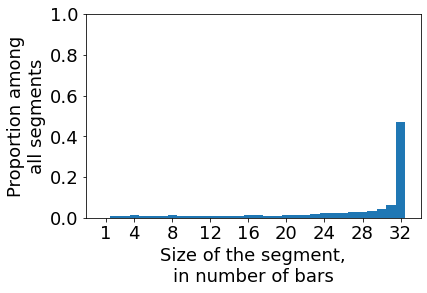

covariance
710 not found, normal ?
716 not found, normal ?
932 not found, normal ?
1248 not found, normal ?
722 not found, normal ?
720 not found, normal ?
711 not found, normal ?
718 not found, normal ?
1291 not found, normal ?
717 not found, normal ?
63 not found, normal ?
719 not found, normal ?
714 not found, normal ?
709 not found, normal ?
261 not found, normal ?
724 not found, normal ?
878 not found, normal ?
1181 not found, normal ?
712 not found, normal ?
964 not found, normal ?
715 not found, normal ?
923 not found, normal ?
723 not found, normal ?


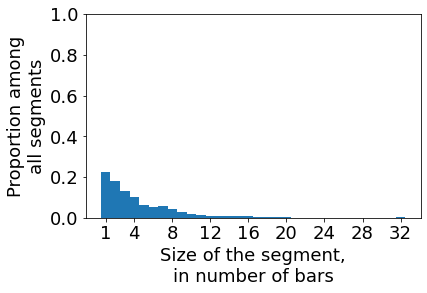

rbf
710 not found, normal ?
716 not found, normal ?
932 not found, normal ?
1248 not found, normal ?
722 not found, normal ?
720 not found, normal ?
711 not found, normal ?
718 not found, normal ?
1291 not found, normal ?
717 not found, normal ?
63 not found, normal ?
719 not found, normal ?
714 not found, normal ?
709 not found, normal ?
261 not found, normal ?
724 not found, normal ?
878 not found, normal ?
1181 not found, normal ?
712 not found, normal ?
964 not found, normal ?
715 not found, normal ?
923 not found, normal ?
723 not found, normal ?


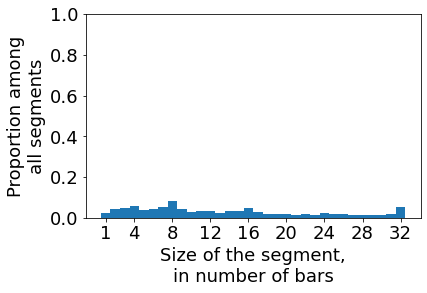

In [3]:
def fixed_condition_lengths_salami(bands_number, autosimilarity_type):
    """
    Compute the length of the estimated segments, for the SALAMI train dataset.
    """
    lengths = [] # List of the lengths of the estimated segments
    all_tracks = salami.load_tracks() # Load all the tracks of the dataset
              
    for key, track in all_tracks.items(): # For each track of the dataset
        if int(key) not in salami_test_dataset: # Train dataset
            try:               
                autosimilarity_barTF = scr.load_barwise_tf_ssm("salami", key, "log_mel_grill", 96, similarity_type = autosimilarity_type, train = True) # Load the self-similarity matrix, pre-computed and stored
                segments = CBM.compute_cbm(autosimilarity_barTF, penalty_weight = 0, penalty_func = "modulo8", bands_number = bands_number)[0] # Compute the segments with the CBM algorithm

                for end, start in segments:
                    lengths.append(start - end) # Store the length of the estimated segment
                
            except TypeError:
                print(f"Error in test at song {key}, {track}")
    
            except FileNotFoundError:
                print(f"{key} not found, normal ?")

    my_plot.plot_lenghts_hist(lengths) # Plot the histogram of the lengths of the estimated segments
    return lengths # Return the list of the lengths of the estimated segments

print("cosine")
lengths_cosine = fixed_condition_lengths_salami(None, "cosine") # Cosine similarity
print("autocorrelation")
lengths_covariance = fixed_condition_lengths_salami(None, "autocorrelation") # Autocorrelation similarity
print("rbf")
lengths_rbf = fixed_condition_lengths_salami(None, "rbf") # RBF similarity

3b
710 not found, normal ?
716 not found, normal ?
932 not found, normal ?
1248 not found, normal ?
722 not found, normal ?
720 not found, normal ?
711 not found, normal ?
718 not found, normal ?
1291 not found, normal ?
717 not found, normal ?
63 not found, normal ?
719 not found, normal ?
714 not found, normal ?
709 not found, normal ?
261 not found, normal ?
724 not found, normal ?
878 not found, normal ?
1181 not found, normal ?
712 not found, normal ?
964 not found, normal ?
715 not found, normal ?
923 not found, normal ?
723 not found, normal ?


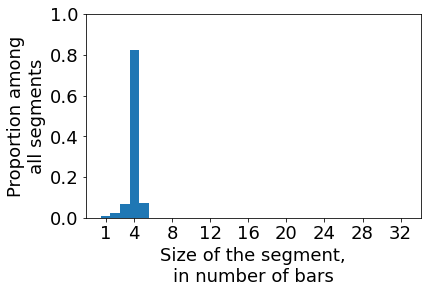

4b
710 not found, normal ?
716 not found, normal ?
932 not found, normal ?
1248 not found, normal ?
722 not found, normal ?
720 not found, normal ?
711 not found, normal ?
718 not found, normal ?
1291 not found, normal ?
717 not found, normal ?
63 not found, normal ?
719 not found, normal ?
714 not found, normal ?
709 not found, normal ?
261 not found, normal ?
724 not found, normal ?
878 not found, normal ?
1181 not found, normal ?
712 not found, normal ?
964 not found, normal ?
715 not found, normal ?
923 not found, normal ?
723 not found, normal ?


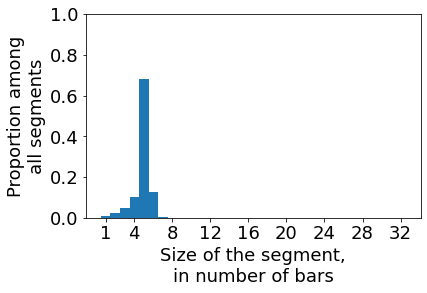

7b
710 not found, normal ?
716 not found, normal ?
932 not found, normal ?
1248 not found, normal ?
722 not found, normal ?
720 not found, normal ?
711 not found, normal ?
718 not found, normal ?
1291 not found, normal ?
717 not found, normal ?
63 not found, normal ?
719 not found, normal ?
714 not found, normal ?
709 not found, normal ?
261 not found, normal ?
724 not found, normal ?
878 not found, normal ?
1181 not found, normal ?
712 not found, normal ?
964 not found, normal ?
715 not found, normal ?
923 not found, normal ?
723 not found, normal ?


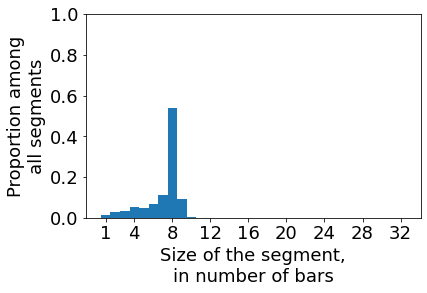

12b
710 not found, normal ?
716 not found, normal ?
932 not found, normal ?
1248 not found, normal ?
722 not found, normal ?
720 not found, normal ?
711 not found, normal ?
718 not found, normal ?
1291 not found, normal ?
717 not found, normal ?
63 not found, normal ?
719 not found, normal ?
714 not found, normal ?
709 not found, normal ?
261 not found, normal ?
724 not found, normal ?
878 not found, normal ?
1181 not found, normal ?
712 not found, normal ?
964 not found, normal ?
715 not found, normal ?
923 not found, normal ?
723 not found, normal ?


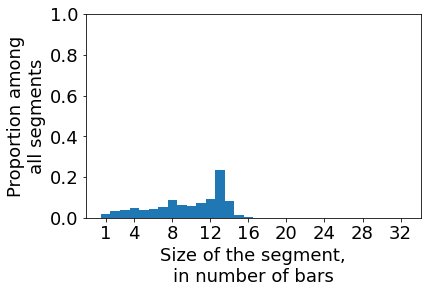

15b
710 not found, normal ?
716 not found, normal ?
932 not found, normal ?
1248 not found, normal ?
722 not found, normal ?
720 not found, normal ?
711 not found, normal ?
718 not found, normal ?
1291 not found, normal ?
717 not found, normal ?
63 not found, normal ?
719 not found, normal ?
714 not found, normal ?
709 not found, normal ?
261 not found, normal ?
724 not found, normal ?
878 not found, normal ?
1181 not found, normal ?
712 not found, normal ?
964 not found, normal ?
715 not found, normal ?
923 not found, normal ?
723 not found, normal ?


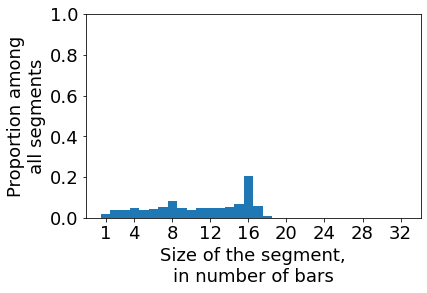

In [4]:
print("3b")
lengths_rbf_3b = fixed_condition_lengths_salami(3, "rbf") # RBF similarity, 3 bands
print("4b")
lengths_rbf_4b = fixed_condition_lengths_salami(4, "rbf") # RBF similarity, 4 bands
print("7b")
lengths_rbf_7b = fixed_condition_lengths_salami(7, "rbf") # RBF similarity, 7 bands
print("12b")
lengths_rbf_12b = fixed_condition_lengths_salami(12, "rbf") # RBF similarity, 12 bands
print("15b")
lengths_rbf_15b = fixed_condition_lengths_salami(15, "rbf") # RBF similarity, 15 bands

710 not found, normal ?
716 not found, normal ?
1248 not found, normal ?
722 not found, normal ?
720 not found, normal ?
711 not found, normal ?
718 not found, normal ?
717 not found, normal ?
63 not found, normal ?
719 not found, normal ?
714 not found, normal ?
709 not found, normal ?
261 not found, normal ?
724 not found, normal ?
878 not found, normal ?
712 not found, normal ?
715 not found, normal ?
723 not found, normal ?


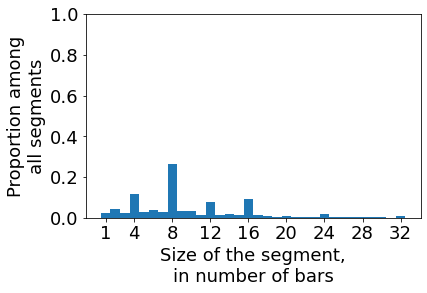

In [5]:
# Compute the lengths in the annotations
lengths_annot_salami = [] # List of the lengths of the annotated segments
all_tracks = salami.load_tracks() # Load all the tracks of the dataset
for key, track in all_tracks.items(): # For each track of the dataset
    if int(key) not in salami_test_dataset: # Train dataset
        try:
            bars = scr.load_bars("salami", key) # Load the bars, pre-computed and stored

            # Load the annotations
            ref_tab = []
            try:
                references_segments = salami.load_sections(track.sections_annotator1_uppercase_path).intervals
                ref_tab.append(references_segments)
            except (TypeError, AttributeError):
                pass
            try:
                references_segments = salami.load_sections(track.sections_annotator2_uppercase_path).intervals
                ref_tab.append(references_segments)
            except (TypeError, AttributeError):
                pass

            for annotations in ref_tab: # For each set of annotations
                barwise_annot = dm.frontiers_from_time_to_bar(np.array(annotations)[:,1], bars) # Convert the annotations from time to bar
                for i in range(len(barwise_annot) - 1):
                    lengths_annot_salami.append(barwise_annot[i+1] - barwise_annot[i]) # Store the length of the annotated segment

        except FileNotFoundError:
            print(f"{key} not found, normal ?")

my_plot.plot_lenghts_hist(lengths_annot_salami) # Plot the histogram of the lengths of the annotated segments


In [10]:
def KL(a, b):
    """
    Kullback-Leibler divergence between two distributions a and b.
    """
    a = np.asarray(a, dtype=np.float64)
    b = np.asarray(b, dtype=np.float64)

    return np.sum(np.where(a != 0, a * np.log(a / b), 0))

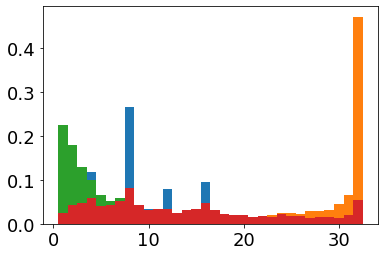

In [7]:
# Compare the distributions of the lengths of the estimated segments (with different similarty functions) and the annotated segments, on one plot.
hist_annot_salami, bins, p = plt.hist(lengths_annot_salami, bins = range(1,34), density = True, cumulative = False, align = "left")
hist_cosine, bins, p = plt.hist(lengths_cosine, bins = range(1,34), density = True, cumulative = False, align = "left")
hist_covariance, bins, p = plt.hist(lengths_covariance, bins = range(1,34), density = True, cumulative = False, align = "left")
hist_rbf, bins, p = plt.hist(lengths_rbf, bins = range(1,34), density = True, cumulative = False, align = "left")

In [11]:
# Compute the KL-divergences between the distributions of the lengths of the estimated segments (with different similarity functions) and the annotated segments
print("KL-divergences between estimated and annotations segments sizes distributions")
print(f"Cosine: {KL(hist_cosine, hist_annot_salami)}")
print(f"Autocorrelation: {KL(hist_covariance, hist_annot_salami)}")
print(f"RBF: {KL(hist_rbf, hist_annot_salami)}")

KL-divergences between estimated and annotations segments sizes distributions
Cosine: 2.249812560203661
Autocorrelation: 0.8513378032743493
RBF: 0.3522820403879737
